In [81]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [82]:
def generate_time_series(batch_size, n_steps):
     freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
     time = np.linspace(0, 1, n_steps)
     series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10)) # fala 1.
     series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + fala 2.
     series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5) # + szum

     return series[..., np.newaxis].astype(np.float32)

In [83]:
n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [84]:
model = keras.models.Sequential([
 keras.layers.Flatten(input_shape=[50, 1]),
 keras.layers.Dense(1)
])

In [85]:
model.compile(loss="mean_squared_error", optimizer="Adam")

In [86]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
# model.save("moj_model_flatten")

Epoch 1/20
219/219 [==============================] - 1s 1ms/step - loss: 0.1394 - val_loss: 0.0623
Epoch 2/20
219/219 [==============================] - 0s 942us/step - loss: 0.0438 - val_loss: 0.0300
Epoch 3/20
219/219 [==============================] - 0s 993us/step - loss: 0.0239 - val_loss: 0.0189
Epoch 4/20
219/219 [==============================] - 0s 997us/step - loss: 0.0171 - val_loss: 0.0150
Epoch 5/20
219/219 [==============================] - 0s 979us/step - loss: 0.0144 - val_loss: 0.0129
Epoch 6/20
219/219 [==============================] - 0s 1000us/step - loss: 0.0127 - val_loss: 0.0114
Epoch 7/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0113 - val_loss: 0.0102
Epoch 8/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0100 - val_loss: 0.0091
Epoch 9/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0090 - val_loss: 0.0083
Epoch 10/20
219/219 [==============================] - 0s 952us/step - loss: 0.0081 - val

In [87]:
mse_valid = model.evaluate(X_valid, y_valid)
print(mse_valid)

63/63 [==============================] - 0s 798us/step - loss: 0.0045
0.0045415423810482025


In [102]:
model_simpleRNN = keras.models.Sequential([keras.layers.SimpleRNN(1, input_shape=[None, 1])])
model_simpleRNN.compile(loss="mean_squared_error", optimizer="Adam")

In [103]:
history = model_simpleRNN.fit(X_train, y_train, epochs=20)

Epoch 1/20
219/219 [==============================] - 2s 6ms/step - loss: 0.1997
Epoch 2/20
219/219 [==============================] - 1s 6ms/step - loss: 0.1025
Epoch 3/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0772
Epoch 4/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0626
Epoch 5/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0524
Epoch 6/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0449
Epoch 7/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0392
Epoch 8/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0348
Epoch 9/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0313
Epoch 10/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0283
Epoch 11/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0259
Epoch 12/20
219/219 [==============================] - 1s 7ms/step - loss: 0.0238
Epoch 13/20
219/219 [====

In [105]:
y_pred = model_simpleRNN.predict(X_test)
mse_valid = model_simpleRNN.evaluate(X_valid, y_valid)
print(mse_valid)

63/63 [==============================] - 0s 3ms/step - loss: 0.0140
0.013976940885186195


In [110]:
print('y_pred.shape = ', y_pred.shape, '\nX_test.shape = ', X_test.shape,'\ny_test.shape = ', y_test.shape)

y_pred.shape =  (1000, 1) 
X_test.shape =  (1000, 50, 1) 
y_test.shape =  (1000, 1)


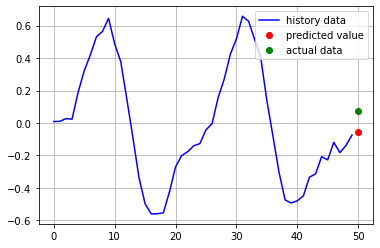

In [125]:
plt.plot(X_test[0,:,0],'b')
plt.plot(len(X_test[0,:,0]), y_pred[0], 'ro')
plt.plot(len(X_test[0,:,0]), y_test[0], 'go')
plt.legend(['history data', 'predicted value', 'actual data'])
plt.grid()
plt.show()

In [157]:
series = generate_time_series(10000, n_steps + 10)
X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

In [147]:
model = keras.models.Sequential([
 keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
 keras.layers.SimpleRNN(20),
 keras.layers.Dense(10)
])
history = model.fit(X_train, Y_train, epochs=20)
model.compile(loss="mean_squared_error", optimizer="Adam")

In [158]:
Y_pred = model.predict(X_test)

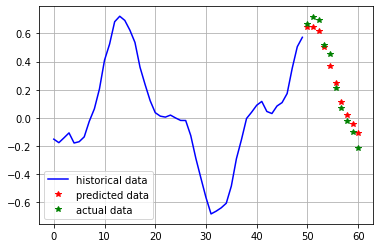

In [159]:
plt.plot(X_test[0,:,0],'b')
plt.plot(np.linspace(len(X_test[0,:,0]),len(X_test[0,:,0]) + len(Y_pred[0]),len(Y_test[0])), Y_pred[0], 'r*')
plt.plot(np.linspace(len(X_test[0,:,0]),len(X_test[0,:,0]) + len(Y_pred[0]),len(Y_test[0])), Y_test[0], 'g*')
plt.legend(['historical data', 'predicted data', 'actual data'])
plt.grid()
plt.show()

In [136]:
print(Y_pred[0].shape)

(10,)


In [143]:
print(np.linspace(len(X_test[0,:,0]),len(X_test[0,:,0]) + len(Y_pred[0]),len(Y_test[0])))

[50.         51.11111111 52.22222222 53.33333333 54.44444444 55.55555556
 56.66666667 57.77777778 58.88888889 60.        ]
